In [1]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
losses = np.load('/Users/juliette/Documents/GitHub/rl-class-assignment-JulietteDecugis/src/losses.npy')
episodes = np.load('/Users/juliette/Documents/GitHub/rl-class-assignment-JulietteDecugis/src/episodes.npy')

In [3]:
import matplotlib.pyplot as plt

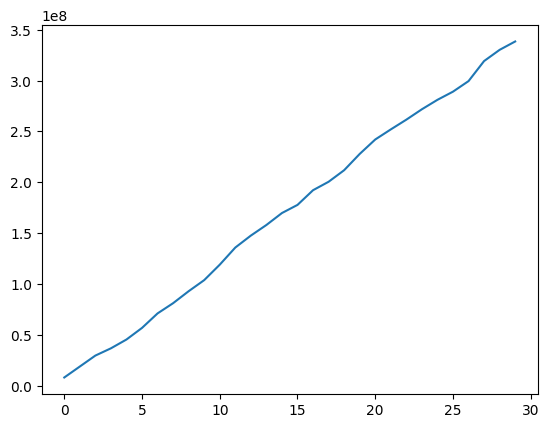

In [4]:
plt.plot(episodes)

In [5]:
from env_hiv import HIVPatient
from gymnasium.wrappers import TimeLimit

env = TimeLimit(
    env=HIVPatient(domain_randomization=False), max_episode_steps=200
)  # The time wrapper limits the number of steps in an episode at 200.

In [6]:
from interface import Agent
import gymnasium as gym

def evaluate_agent(agent: Agent, env: gym.Env, nb_episode: int = 10) -> float:
    """
    Evaluate an agent in a given environment.

    Args:
        agent (Agent): The agent to evaluate.
        env (gym.Env): The environment to evaluate the agent in.
        nb_episode (int): The number of episode to evaluate the agent.

    Returns:
        float: The mean reward of the agent over the episodes.
    """
    rewards: list[float] = []
    for _ in range(nb_episode):
        obs, info = env.reset()
        done = False
        truncated = False
        episode_reward = 0
        while not done and not truncated:
            action = agent.act(obs)
            obs, reward, done, truncated, _ = env.step(action)
            episode_reward += reward
        rewards.append(episode_reward)
    return rewards

In [7]:
from train import ProjectAgent

model_small = ProjectAgent()
model_small.load()

In [15]:
rewards = evaluate_agent(model_small, env)

6008.100000000002
16198.526983450136
25372.086107021147
36522.17699502292
39628.329735583015
42294.863378511036
53676.795336699215
69729.84757863324
94356.75649309177
92596.63506899725
94244.20618844939
105078.56100489266
119016.05791722171
133521.0729072438
145698.63885132
152506.0214195968
151802.85021216664
143344.18632018974
127054.96593109993
119788.75981247328
108602.00657819712
104255.69505605694
94466.52462579041
88662.47005295615
90335.63485079465
84693.62067590118
80494.35248953041
82056.32293403134
75054.2181162142
69686.77365496522
66881.9513816771
66757.37276170866
70673.7612021421
64381.393759656145
59197.9624236462
55401.62953139124
53259.39540982997
52447.25155991051
52663.394496249246
53618.25835778203
55030.15496927417
56626.72974846347
58152.16159636577
59379.06240093375
60122.70353641055
60254.15602620686
59708.79991826838
58487.656825266306
56650.82258264091
54304.27237557266
51582.79100384025
48632.31085414671
45594.4927425774
42595.30147289847
39738.108605243455


KeyboardInterrupt: 

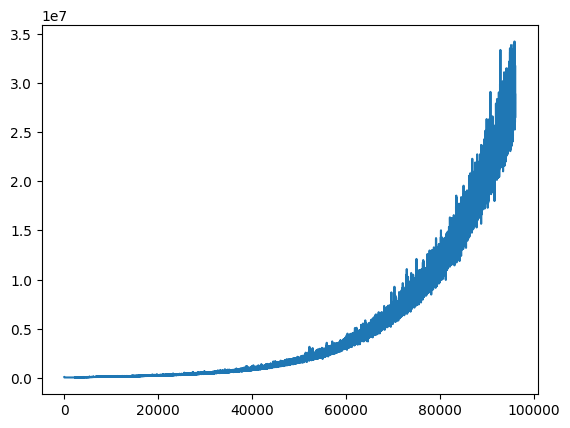

In [ ]:
plt.plot(losses)